<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Шаг-1.-Загрузим-данные" data-toc-modified-id="Шаг-1.-Загрузим-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузим данные</a></span></li><li><span><a href="#Шаг-2.-Проведем-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Шаг-2.-Проведем-исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Проведем исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Шаг-3.-Построим-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Шаг-3.-Построим-модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Построим модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Шаг-4.-Сделаем-кластеризацию-клиентов" data-toc-modified-id="Шаг-4.-Сделаем-кластеризацию-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Сделаем кластеризацию клиентов</a></span></li><li><span><a href="#Шаг-5.-Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Шаг-5.-Сформулируем-выводы-и-сделаем-базовые-рекомендации-по-работе-с-клиентами-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами</a></span></li></ul></div>

# Прогноз оттока клиентов в сети фитнес-центров «Культурист-датасаентист»

### Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов — отток клиентов. Отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Необходимо провести анализ и подготовить план действий по удержанию клиентов.

**Цель исследования**:

- прогнозирование вероятности оттока (на уровне следующего месяца) для каждого клиента;
- выделить целевые группы клиентов;
- анализ основных признаков, наиболее сильно влияющих на отток;
- подготовить рекомендации по повышению качества работы с клиентами:
  предложить меры по снижению оттока;
  определить другие особенности взаимодействия с клиентами.

### Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

## Шаг 1. Загрузим данные

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
# загрузим файл с анкетами клиентов
fit = pd.read_csv('C:/Users/fima3/Documents/Практикум Аналитик/Модуль 3/Спринт 10/Project/gym_churn.csv')

In [3]:
# посмотрим общую информацию
fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В предоставленной таблице 4000 строк и  14 полей типа int64 и float64, пропущенные значения отсутствуют.

In [4]:
# посмотрим на первые пять строк датафрейма
fit.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Вывод**: загрузили данные и предварительно оценили их. Более точный анализ данных проведем на следующем шаге.

## Шаг 2. Проведем исследовательский анализ данных (EDA)

In [5]:
# посмотрим на размер датафрейма
fit.shape

(4000, 14)

В нашем распоряжении 4000 наблюдений и 13 признаков и целевая переменная`Churn`

In [6]:
# проверим данные на пропуски
fit.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропусков нет.

In [7]:
# посмотрим статистику
fit.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


У нас имеется 6 категориальных признаков (`gender`, `Near_Location`, `Partner`, `Promo_friends`, `Phone`, `Group_visits`) и 7 числовых (`Age`, `Contract_period`, `Month_to_end_contract`, `Avg_additional_charges_total`, `Lifetime`, `Avg_class_frequency_total`, `Avg_class_frequency_current_month`). Категориальные признаки принимают значения "0" или "1", поэтому их не надо преобразовывать. По описательной статистики видно, что аномальные значения отсутствуют.

Разделим данные по клиентам на две группы - те, кто ушел в отток и тех, кто остался - и найдем средние значения признаков в двух группах.

In [8]:
fit.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Из этой таблицы мы можем сделать вывод о том, что данные сбалансированы по признаку `gender` (примерно 50 на 50 для каждой группы); средний возраст клиентов - от 27 до 30 лет (уходят более молодые клиенты); те, кто остался посещали занятия чаще, посещали групповые занятия, тратили на доп. услуги больше чем те, кто ушел, а также срок их абонемента длиннее. Почти по каждому признаку есть влияние на отток клиентов, кроме пола и наличия контактного телефона.

Построим графики распределения категориальных признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

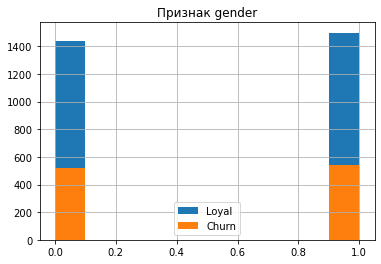

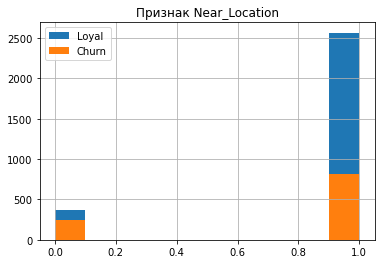

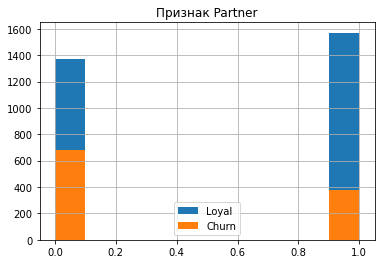

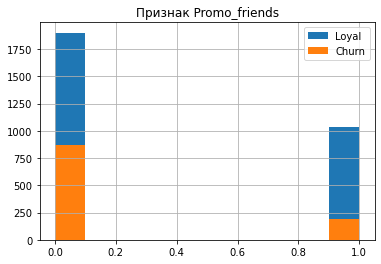

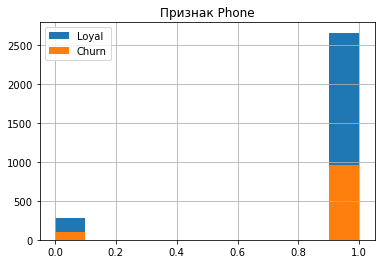

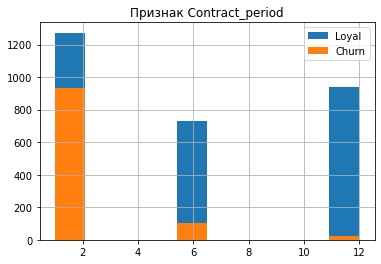

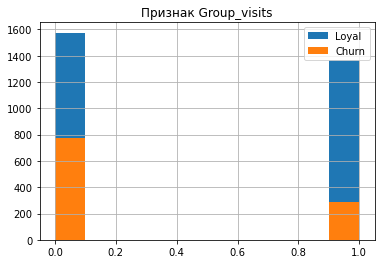

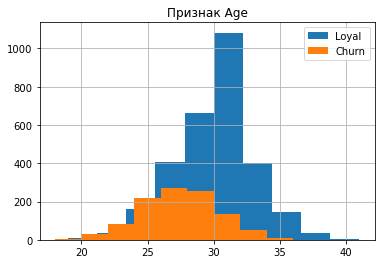

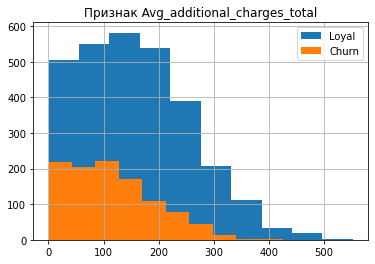

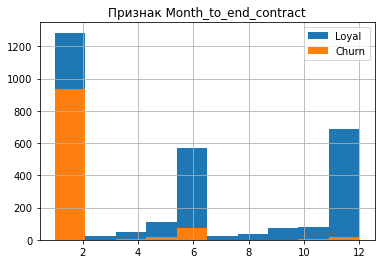

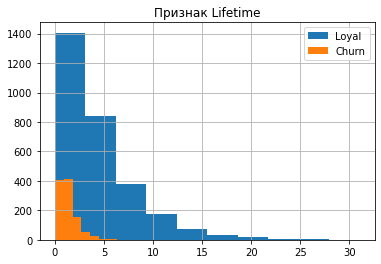

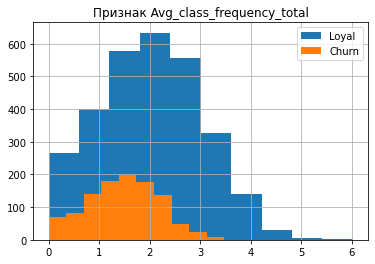

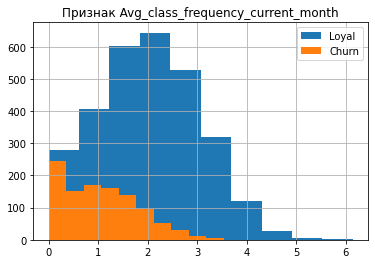

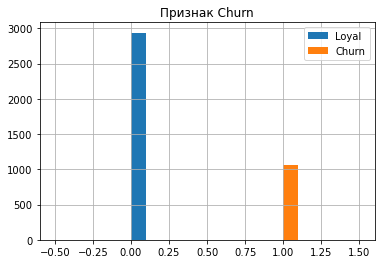

In [9]:
for column in fit.columns:
    fit.query('Churn == 0')[column].hist()
    fit.query('Churn == 1')[column].hist()
    plt.title('Признак ' + column)
    plt.legend(['Loyal', 'Churn'])
    plt.show()

По графикам отметим, что распределение данных в двух группах по категориальным признакам очень похоже. В основном клиенты обеих групп выбирают клуб рядом с домом/работой, не использовали промокод от друга, у большинства есть телефон. Однако в группе с нулевым оттоком преобладают сотрудники компаний-партнеров и они практически одинаково заинтересованы в групповых и индивидуальных занятиях, а в группе, где отток наоборот клиенты пришли не из компаний-партнеров и предпочитают индивидуальные занятия.

Построим столбчатые гистограммы числовых признаков для тех, кто ушёл и тех, кто остался.

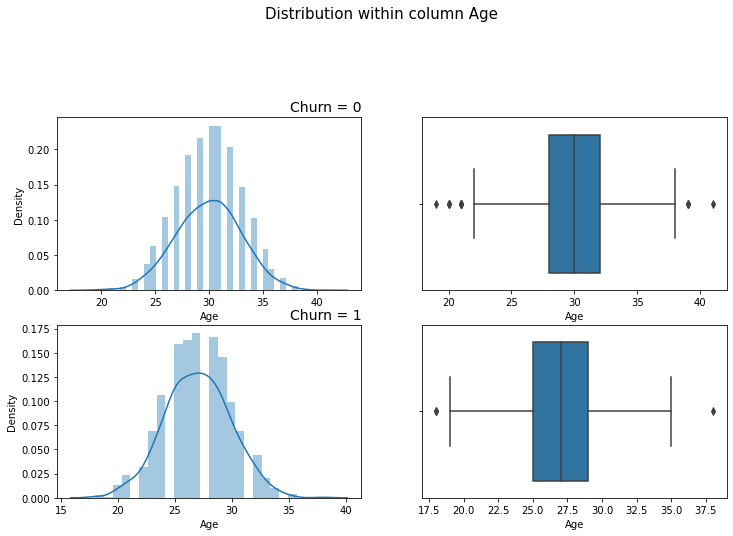

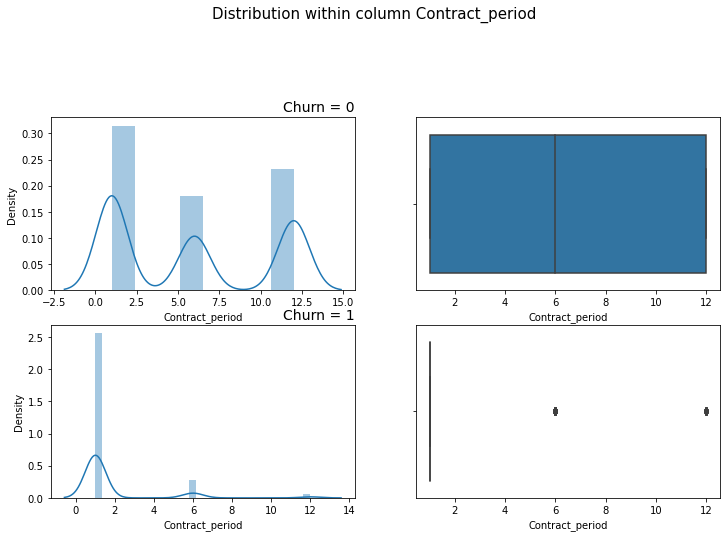

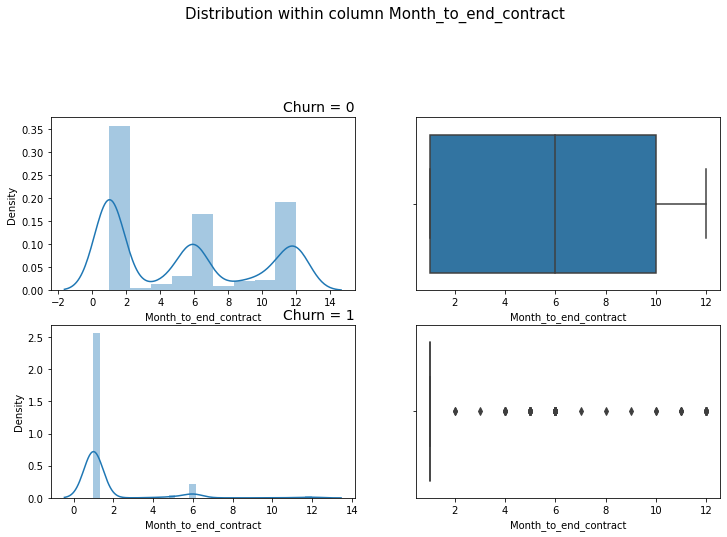

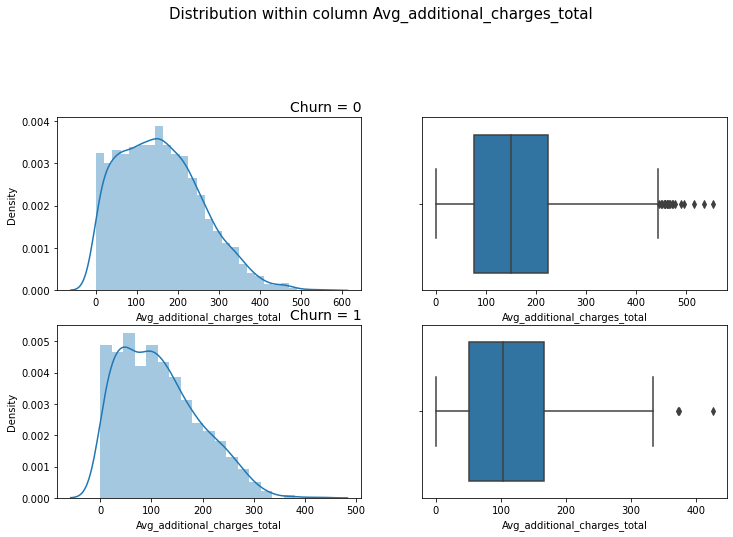

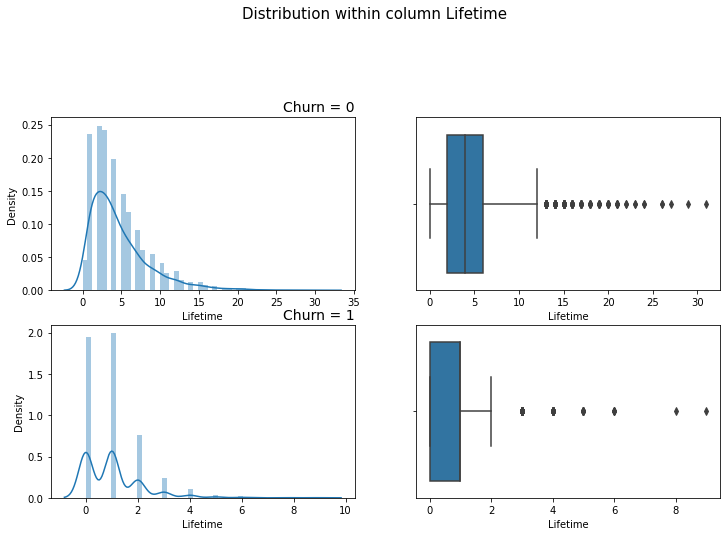

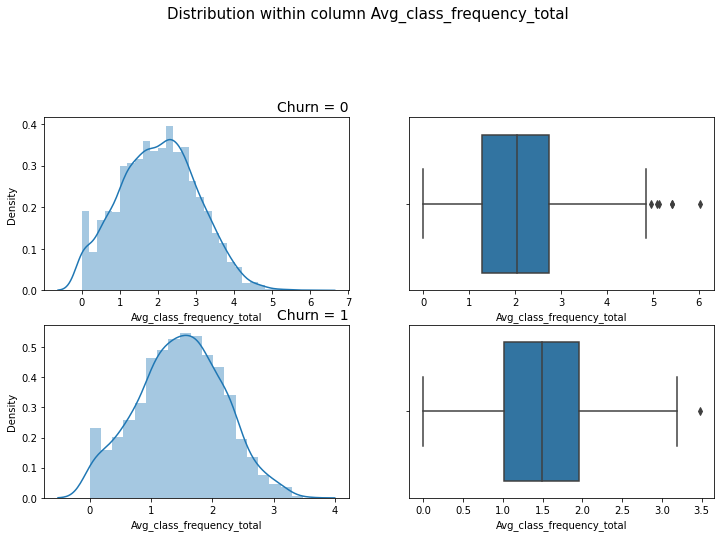

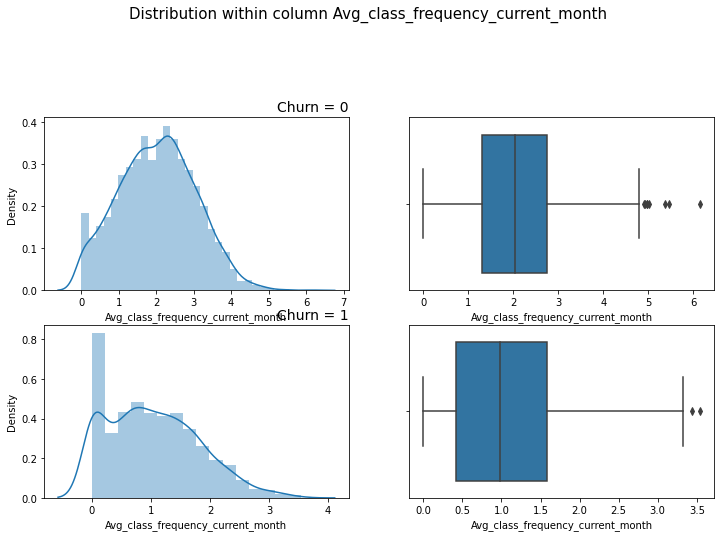

In [10]:
number_columns = ['Age', 'Contract_period', 'Month_to_end_contract', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
for col in number_columns:
    fig, axes = plt.subplots(2, 2, figsize=(12, 7))
    
    fig.suptitle(f'Distribution within column {col}', y=1.1, fontsize=15)
    axes[0,0].set_title('Churn = 0', fontsize=14, loc='right')
    sns.distplot(fit.query('Churn == 0')[col], ax=axes[0,0])
    sns.boxplot(fit.query('Churn == 0')[col], ax = axes[0,1])
    
    axes[1,0].set_title('Churn = 1', fontsize=14, loc='right')
    sns.distplot(fit.query('Churn == 1')[col], ax=axes[1,0])
    sns.boxplot(fit.query('Churn == 1')[col], ax = axes[1,1])
    

Распределения признаков `Age`, `Avg_additional_charges_total`, `Avg_class_frequency_total`, `Avg_class_frequency_current_month`  походят на график стандартного нормального распределения. Признаки ведут себя более-менее нормально. Есть выбросы для некоторых признаков, но они в пределах допустимых значений, поэтому оставим их как есть. По возрасту клиенты группы с оттоком моложе, у них меньше срок абонемента, меньше доп. расходы и меньше частота посещений в неделю.

Построим матрицу корреляций и отобразим её.

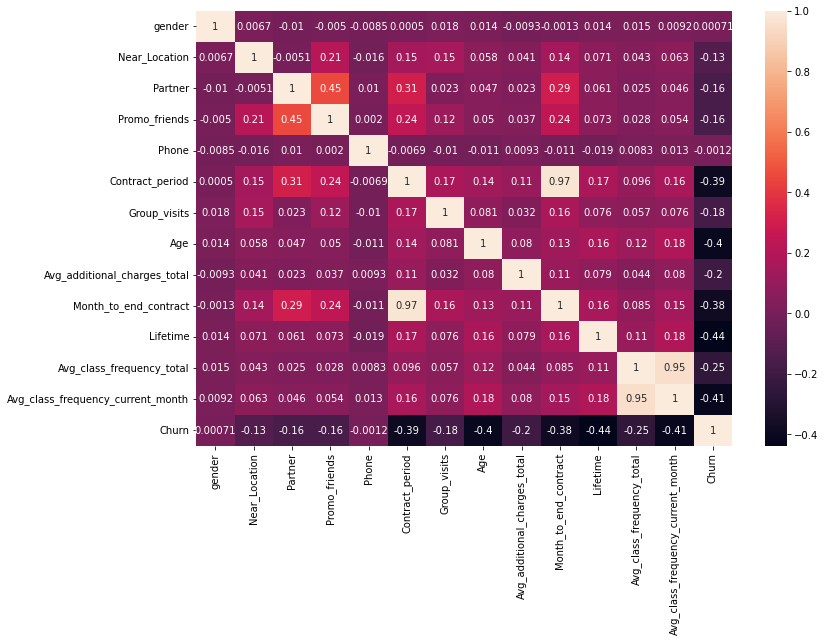

In [11]:
cm = fit.corr()
plt.figure(figsize = (12,8))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True);

По карте видим, что сильно коррелируют признаки `Contract_period` и `Month_to_end_contract`, а также `Avg_class_frequency_total`, `Avg_class_frequency_current_month` и это очевидно, потому что эти признаки взаимосвязаны. С целевой переменной `Churn` не наблюдается сильной корреляции признаков, больше всего с ней коррелируют Lifetime, частота посещений в неделю за последний месяц и возраст.

**Вывод**: провели исследовательский анализ данных и выявили, что пропуски в данных отсутствуют, имеются 6 категориальных и 7 числовых признаков, распределение категориальных признаков в группах с оттоком и без похоже, распределение числовых признаков более-менее нормально, имеются выбросы, но они в пределах возможных значений, сильной корреляции между признаками и целевой переменной не наблюдается, больше всего с ней коррелируют такие признаки, как Lifetime, частота посещений в неделю за последний месяц и возраст.

## Шаг 3. Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. Для начала  разделим данные на обучающую и валидационную выборку функцией train_test_split().

In [12]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = fit.drop(columns=['Churn'], axis=1)
y = fit['Churn']

# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Обучим модель на train-выборке двумя алгоритмами: логистической регрессией и случайным лесом. Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

In [13]:
# создадим функцию, которая принимает на вход модель и данные и выводит метрики
def print_metrics(m, y_pred, y_test):
    print(m)
    print(f'Accuracy:{accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision:{precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')

In [14]:
# реализация алгоритма "Логистическая регрессия"
lr_model = LogisticRegression(random_state=0, solver='liblinear')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print_metrics('Logistic Regression', y_pred, y_test)

Logistic Regression
Accuracy:0.93
Precision:0.89
Recall: 0.83


In [15]:
# реализация алгоритма "Случайный лес"
rfc_model = RandomForestClassifier(random_state = 0)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
print_metrics('Random Forest Classifier', y_pred, y_test)

Random Forest Classifier
Accuracy:0.92
Precision:0.88
Recall: 0.83


Логистическая регрессия показала чуть лучше метрики, чем Случайный лес.

In [16]:
# посмотрим, как соотносятся классы набора данных
print('Соотношение классов:\n', fit['Churn'].value_counts())

Соотношение классов:
 0    2939
1    1061
Name: Churn, dtype: int64


Классы не сбалансированы, "0" класс преобладает, поэтому метрика Accuracy работает плохо. Выберем за приоритетную метрику  - recall и скорректируем ее, задав порог 0.4 и используя метод predict_proba(), скорректированный на баланс классов.

In [17]:
# задаем порог
threshold = 0.4
# воспользуемся уже обученной моделью логистической регрессии, чтобы сделать прогнозы
probabilities = lr_model.predict_proba(X_test)[:, 1]
custom_predictions = [0 if i < threshold else 1 for i in probabilities]
print_metrics('Logistic Regression Custom', custom_predictions, y_test)

Logistic Regression Custom
Accuracy:0.93
Precision:0.86
Recall: 0.87


Aсcuracy не поменялась, зато мы смогли повысить Recall, но немного потеряли в точности.

Посмотрим на важность признаков для лучшей модели.

In [18]:
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': rfc_model.feature_importances_})
fi_df.sort_values(by='importance', ascending=False)

,feature,importance
10,Lifetime,0.270336
12,Avg_class_frequency_current_month,0.176142
11,Avg_class_frequency_total,0.135955
7,Age,0.121477
8,Avg_additional_charges_total,0.088327
9,Month_to_end_contract,0.072941
5,Contract_period,0.067406
6,Group_visits,0.016090
0,gender,0.012293
2,Partner,0.012099


Для модели случайный лес наиболее важными признаками являются: Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month, а также Age, что в принципе совпадает с данными по нашей тепловой карте.

**Вывод**: построили модель прогнозирования оттока клиентов, выбрав два алгорима: логистическая регрессия и случайный лес. Оценили метрики и выявили , что логистическая регрессия показывает чуть лучше метрики, чем случайный лес, но в целом обе модели хорошо работают. Выявили наиболее важные признаки для лучшей модели: Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month, а также Age.

## Шаг 4. Сделаем кластеризацию клиентов

 Проведем кластеризацию объектов (клиентов). Для начала стандартизируем данные. 

In [19]:
scaler = StandardScaler()
x_sc= scaler.fit_transform(fit.drop(columns=['Churn']))

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

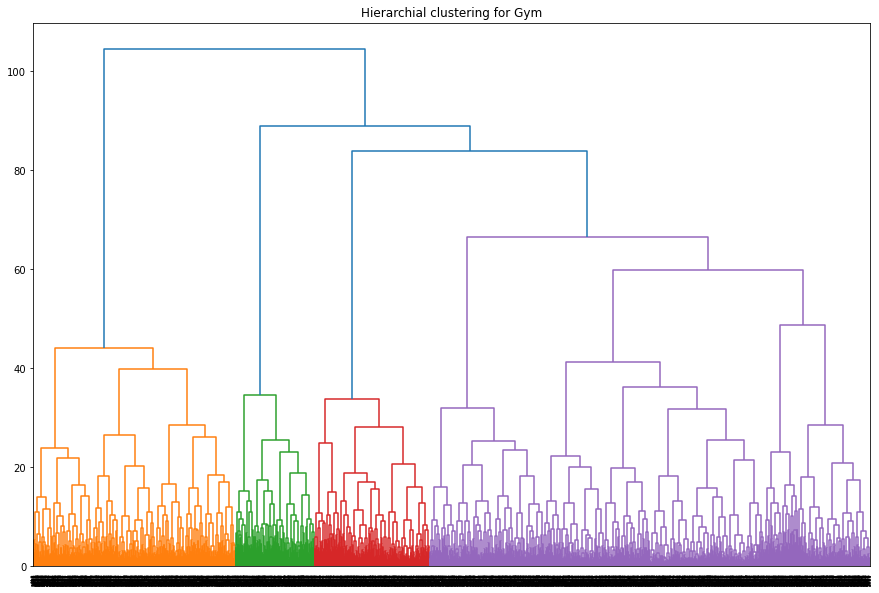

In [20]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for Gym')
plt.show() 

На основании дендрограммы можно выделить оптимальное число кластеров 4 - по разным цветам.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров примем n=5.

In [21]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 
# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(x_sc) 

Посчитаем средние значения признаков для кластеров. 

In [22]:
# сохраняем метки кластера в поле нашего датасета
fit['cluster'] = labels

# средниe значения признаков по кластеру
fit.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Из этой таблицы мы видим, что внутри кластеров клиенты распределены по полу почти в равных долях, средний возраст внутри кластеров похож. В каждом кластере есть свои отличительные признаки, например в кластере 0 - клиенты с самым длинным сроком договора и с близким к 0 оттоком, в кластере 1  - клиенты без номера телефона, в кластере 2 - клиенты, выбравшие фитнес клуб не рядом с домом/работой, не особо пользующиеся промокодами от друзей, предпочитающие индивидуальные занятия, склонные к оттоку, в кластере 3 - клиенты, которые меньше всего посещают занятия в неделю и тоже с высоким оттоком, а вкластере 4 - клиенты чаще всего посещающие занятия в неделю и больше всего тратящие на доп. услуги, с оттоком близким к 0.

Построим распределения признаков для кластеров. 

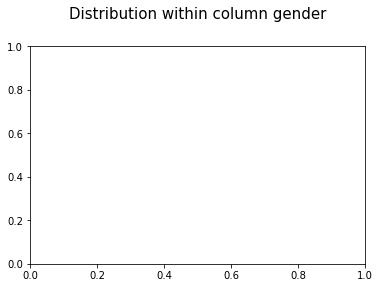

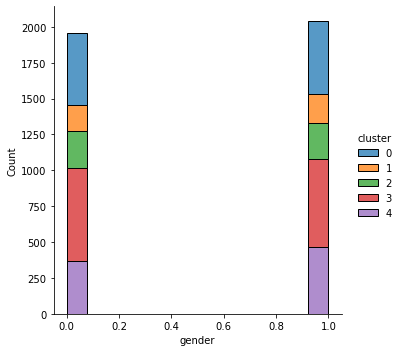

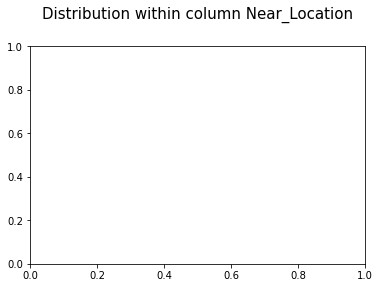

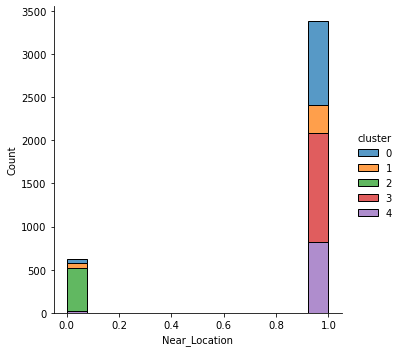

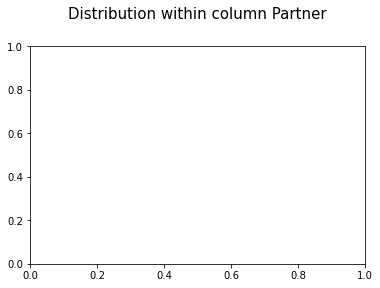

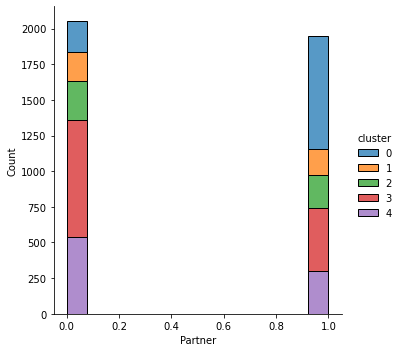

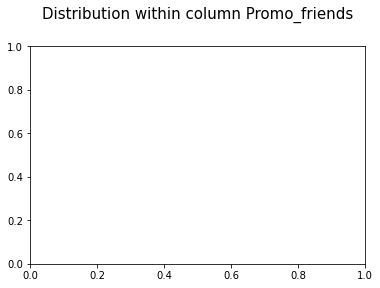

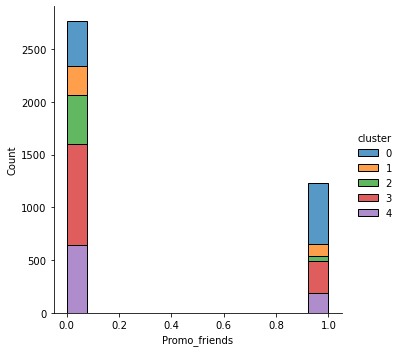

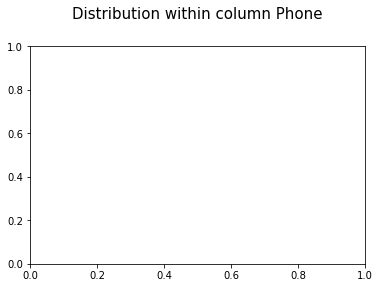

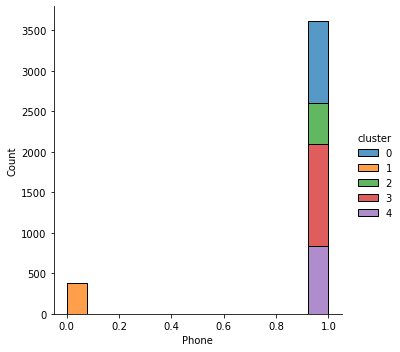

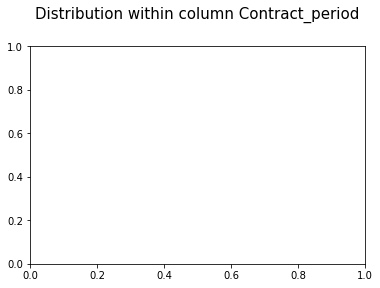

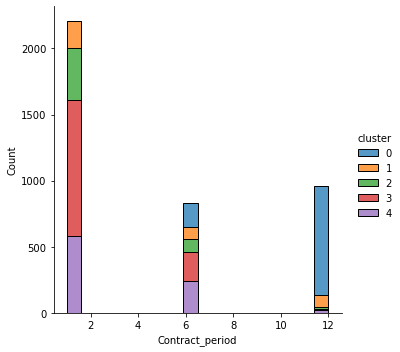

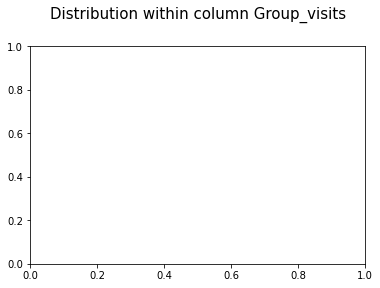

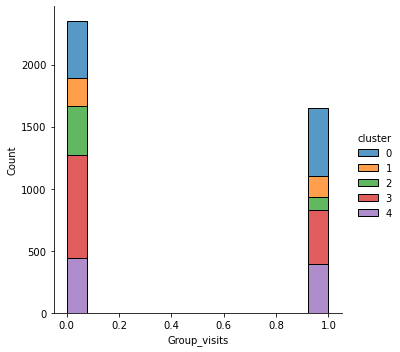

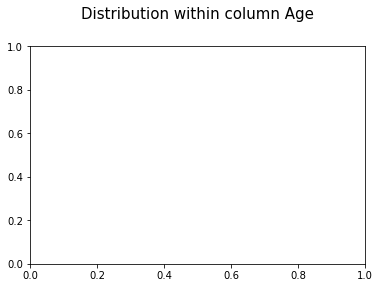

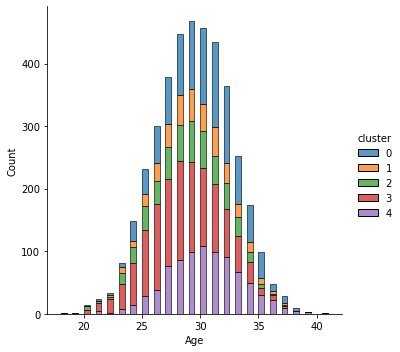

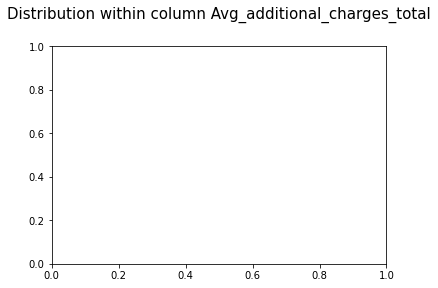

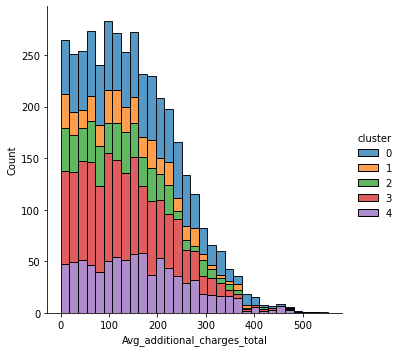

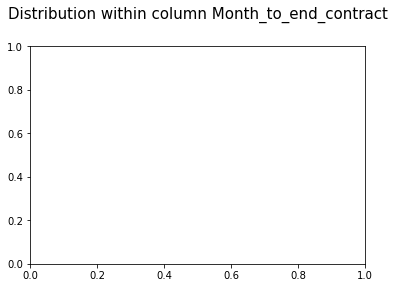

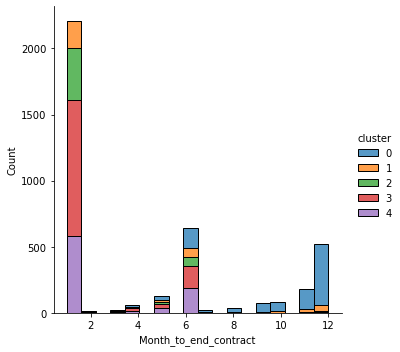

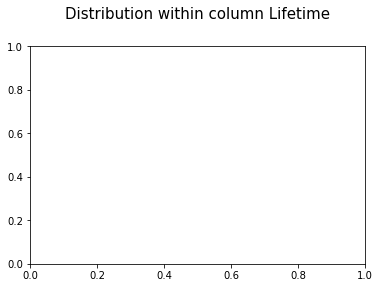

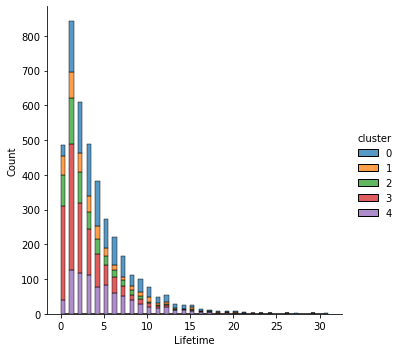

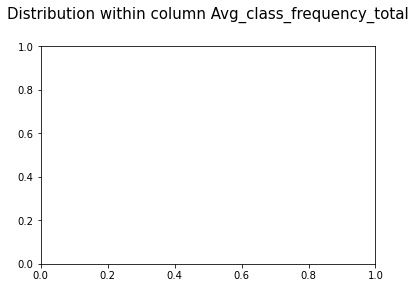

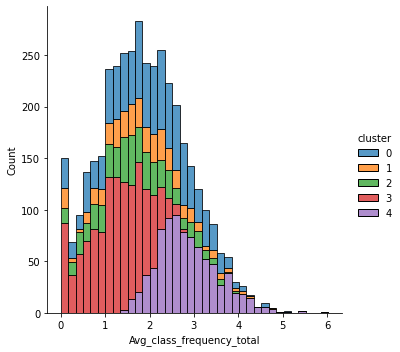

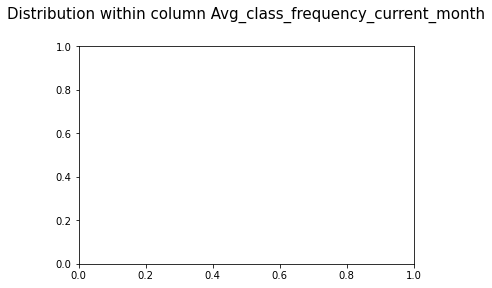

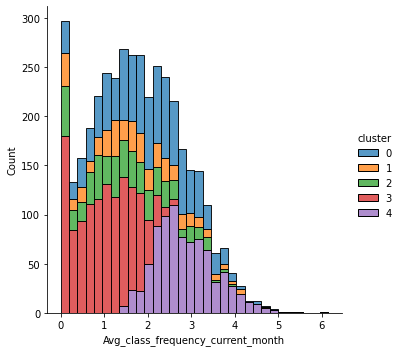

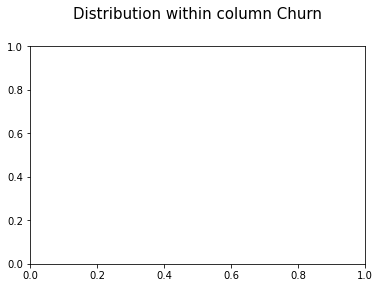

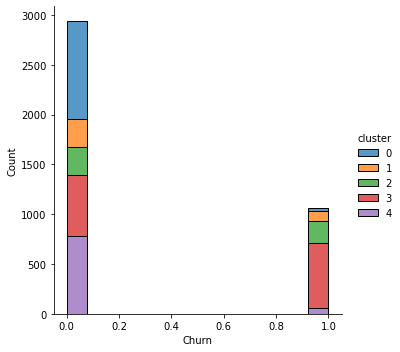

In [23]:
for col in fit.columns.drop('cluster'):
    plt.title(f'Distribution within column {col}', y=1.1, fontsize=15)

    sns.displot(data=fit, x=col, hue='cluster', palette='tab10', multiple="stack", legend = True)

    plt.show()

Распределения признаков еще раз подтверждают выводы по особенностям кластеров: 0 и 4 кластеры - клиенты отличаются частым посещением занятий, выбором длительных абонементов (для 0 кластера) и высоким значением Lifetime, также для них свойственно посещать групповые занятия и клуб расположен рядом с их домом/работой, возраст постарше ближе к 30; клиенты 2 и 3 кластера посещают меньше занятий в неделю, меньше всех тратят на доп. услуги, срок их абонементов короче, Lifetime ниже, они предпочитают индивидуальные занятия, клуб расположен далеко от дома.работы (2 кластер), возраст помладше - 25 - 28 лет; 1 кластер - это клиенты с признаками похожими на 0 кластер, но они не оставляют номер телефона.

Еще раз посчитаем долю оттока для кластеров.

In [24]:
fit.groupby('cluster').agg({'Churn': 'mean'}).sort_values(by='Churn')

,Churn
cluster,
0,0.027723
4,0.068019
1,0.267532
2,0.443564
3,0.514263


Кластеры  2 и 3 склонны к оттоку, кластеры 0 и 4 надежные, 1 кластер имеет пограничные значения оттока.

**Вывод**: разделили клиентов фитнес клуба на группы (кластеры) с помощью кластеризации. Получили 5 кластеров, из которых 2 и 3 склонны к оттоку, а 0 и 4  - надежные клиенты.

## Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

По итогам исследования научились прогнозировать вероятность оттока в следующем месяце для каждго клиента, для этого построили модель бинарной классификации и выбрали наиболее удачный алгоритм "логистическая регрессия". С помощью кластеризации выделили 5 наиболее ярких групп клиентов и охарактеризовали их основные свойства, выявили, что 2 и 3 кластеры склонны к оттоку, а 0 и 4 - надежные. Проанализировали признаки, наиболее сильно влияющие на отток: Avg_class_frequency_total, Avg_class_frequency_current_month,  Lifetime, Age.

Меры по снижению оттока и улучшению стратегии удержания:
1. Необходимо мотивировать клиентов на увеличение срока абонемента и увеличение числа занятий в неделю, чтобы клиенты становились более надежными. Для этого можно предложить какие-то промоакции либо выгодные скидки при покупке абонемента на год или полгода, месяц - два в подарок. А также можно мотивировать клиентов на увеличение занятий в неделю с помощью подарка самым активным клиентам - например, свежевыжатый сок в кафе. Таким образом , мы можем еще привлечь наших клиентов на использование дополнительных услуг клуба и косвенно увеличить прибыль.
2. Так как клиенты данных групп в основном не пользоваллись промокодом от знакомого и предпочитают индивидуальные занятия, то скорее всего у них нет знакомых в этом клубе и необходимо их привлечь к групповым занятиям (например, проводить интересные открытые уроки, мастер-классы) и предлагать чаще промокод для друга, чтобы они привели знакомых и друг друга могли мотивировать на занятия в будущем.
3. Так как по возрасту в группе оттока преобладают более молодые клиенты, то можно ввести какие-то дополнительные услуги, которые были бы интересны для данного сегмента: например, кафе-бар со смузи и фрешами, опять же мастер-классы по популярным направлениям - зож, outdoor программы, организовать кемпы, ретриты для сплочения клиентов.
4. Проводить бесплатные пробные групповые занятия, чтобы клиенты-одиночки смогли вливаться в жизнь фитнес-центра.
5. Как вариант еще возможно заключить партнерские договора с компаниями, если много клиентов из этих компаний посещают клуб.
